In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from IPython.core.interactiveshell import InteractiveShell


In [2]:
InteractiveShell.ast_node_interactivity = "all"
ride_data_df = pd.read_csv('Resources/ride_data.csv')
city_data_df = pd.read_csv('Resources/city_data.csv')
ride_data_df
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
city_data_df.isna().sum()
ride_data_df.isna().values.any()
city_data_df.dtypes
ride_data_df.dtypes

city            0
driver_count    0
type            0
dtype: int64

False

city            object
driver_count     int64
type            object
dtype: object

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [4]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [5]:
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

66

36

18

In [6]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, how='left', on=['city','city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [7]:
pyber_data_df['city'].unique()

array(['Lake Jonathanshire', 'South Michelleport', 'Port Samanthamouth',
       'Rodneyfort', 'South Jack', 'South Latoya', 'New Paulville',
       'Simpsonburgh', 'South Karenland', 'North Jasmine',
       'New Kimberlyborough', 'West Angela', 'Roberthaven', 'North Jason',
       'Williamsview', 'Leahton', 'West Anthony', 'New Paulton',
       'West Patrickchester', 'Deanville', 'West Josephberg',
       'West Samuelburgh', 'West Heidi', 'Loganberg', 'Huntermouth',
       'Grahamburgh', 'Port Frank', 'East Kaylahaven', 'West Robert',
       'North Markport', 'Richardfort', 'Reynoldsfurt', 'Justinberg',
       'Martinezhaven', 'Jerryton', 'Lake Scottton', 'South Evanton',
       'Rogerston', 'West Ericstad', 'Hurleymouth', 'Joneschester',
       'Port Angela', 'Barajasview', 'West Christopherberg',
       'New Jacobville', 'Port David', 'Valentineton', 'Carriemouth',
       'Williamsstad', 'Royland', 'Karenberg', 'Christopherfurt',
       'Liumouth', 'Johnton', 'Erikaland', 'Raymondhav

In [8]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [10]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.mean()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

34.63776503126503

In [11]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

Text(0, 0.5, 'Average Fare ($)')

Text(0.5, 0, 'Total Number of Rides (Per City)')

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

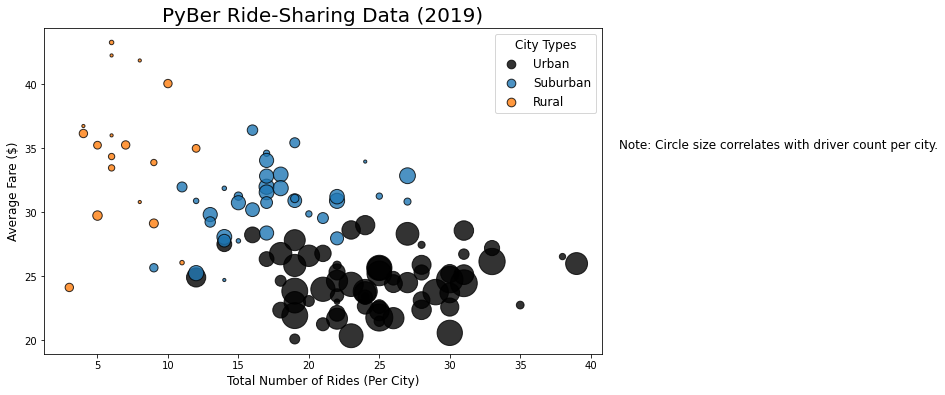

In [12]:
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count,edgecolor='black', alpha=0.8, linewidth=1, label='Urban', c='black')
ax.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, edgecolors='black', alpha=0.8, linewidth=1, label='Suburban')
ax.scatter(rural_ride_count,rural_avg_fare, s=10*rural_driver_count, edgecolor='black', alpha=0.8, linewidth=1, label='Rural')
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.legend()
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
for i in range(3):
    lgnd.legendHandles[i]._sizes = [75]
# lgnd.legendHandles[0]._sizes = [75]
# lgnd.legendHandles[1]._sizes = [75]
# lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
ax.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig('Analysis/Fig1.png', bbox_inches='tight')

In [13]:
urban_cities_df.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [14]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [15]:
suburban_ride_count.median()

17.0

In [16]:
import numpy as np
import scipy.stats as sts

In [17]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

mode_rural = sts.mode(rural_ride_count)
mode_rural

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [18]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [19]:
sts.mode(suburban_driver_count)

ModeResult(mode=array([20.]), count=array([5]))

{'whiskers': [<matplotlib.lines.Line2D at 0x1c016033488>,
 'caps': [<matplotlib.lines.Line2D at 0x1c016043888>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c016040fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c016051748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c016043948>],
 'means': []}

Text(0.5, 1.0, 'Ride Count Data (2019)')

Text(0, 0.5, 'Number of Rides')

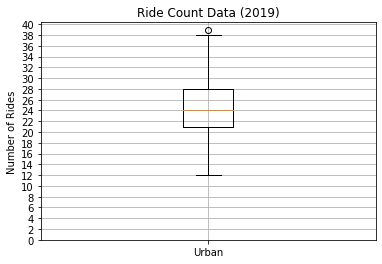

In [20]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()

Text(0.5, 1.0, 'Ride Count Data (2019)')

Text(0, 0.5, 'Number of Rides')

Text(0.5, 0, 'City Types')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c016104908>,
 'caps': [<matplotlib.lines.Line2D at 0x1c016107448>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c016102208>,
 'medians': [<matplotlib.lines.Line2D at 0x1c016107b08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c016107f88>,
 'means': []}

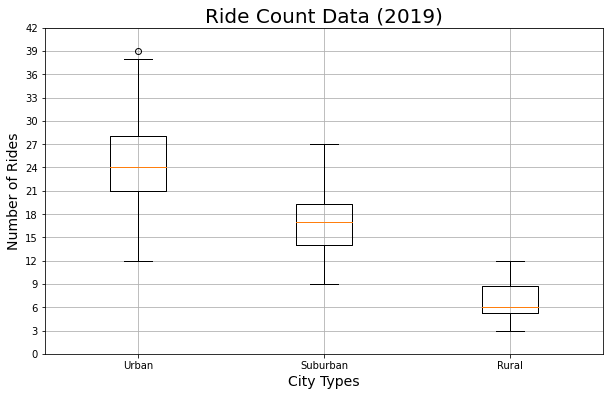

In [21]:
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig ,ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3))
ax.grid()
plt.show()

In [22]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


{'whiskers': [<matplotlib.lines.Line2D at 0x1c01618e108>,
 'caps': [<matplotlib.lines.Line2D at 0x1c01618e748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c016187b48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0161974c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c016197988>],
 'means': []}

Text(0.5, 1.0, 'Ride Share Data (2019)')

Text(0, 0.5, 'Fare ($USD)')

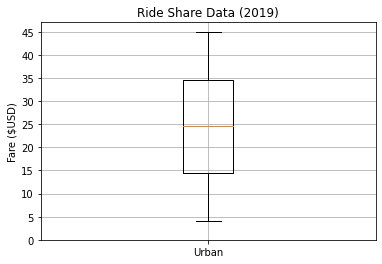

In [23]:
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=['Urban'])
ax.set_title('Ride Share Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,50, step=5))
ax.grid()
plt.show()

In [24]:
urban_drivers = urban_cities_df['driver_count']

{'whiskers': [<matplotlib.lines.Line2D at 0x1c016210e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0162164c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0162108c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c01621b6c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c01621bd08>],
 'means': []}

Text(0.5, 1.0, 'Driver Count Data (2019)')

Text(0, 0.5, 'Number of Drivers)')

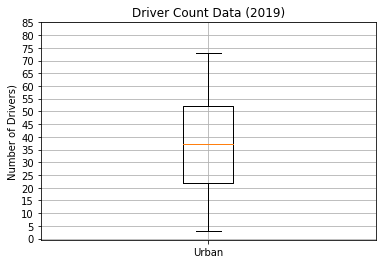

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [25]:
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=['Urban'])
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [26]:
sum_fares_by_type = pyber_data_df.groupby('type').sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [28]:
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [30]:
type_percents = sum_fares_by_type/total_fares*100
round(type_percents,2)

type
Rural        6.81
Suburban    30.46
Urban       62.72
Name: fare, dtype: float64

([<matplotlib.patches.Wedge at 0x1c01a32a988>,
 [Text(-2.0953958266061514, 0.6703106219071298, 'Rural'),
  Text(-1.4329754831860737, -1.6693056234817039, 'Suburban'),
  Text(1.8345478693330772, 1.387239746808556, 'Urban')],
 [Text(-1.1429431781488097, 0.36562397558570714, '6.8%'),
  Text(-0.7816229908287674, -0.9105303400809293, '30.5%'),
  Text(1.0369183609273913, 0.7840920308048359, '62.7%')])

Text(0.5, 1.5, '% of Total Fares by City Type')

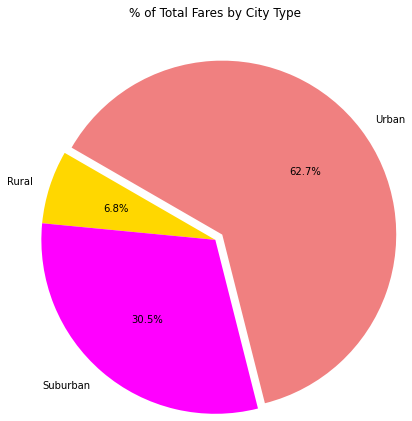

In [56]:
fig, ax = plt.subplots()
ax.pie(type_percents, labels=['Rural', 'Suburban', 'Urban'], colors=['gold', 'magenta', 'lightcoral'], explode=[0,0,0.1], autopct='%1.1f%%', radius=2, startangle=150)
ax.set_title('% of Total Fares by City Type', y=1.5)
plt.show()

In [61]:
ride_percentage = pyber_data_df.groupby('type').count()['ride_id'] / pyber_data_df['ride_id'].count()*100
round(ride_percentage, 2)

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: ride_id, dtype: float64

([<matplotlib.patches.Wedge at 0x1c01ca11288>,
 [Text(-1.0301623657919179, 0.3857013094429408, 'Rural'),
  Text(-0.8863415953607163, -0.6514588063211828, 'Suburban'),
  Text(1.0707050316062852, 0.5418401381339186, 'Urban')],
 [Text(-0.5619067449774097, 0.21038253242342222, '5.3%'),
  Text(-0.4834590520149361, -0.3553411670842815, '26.3%'),
  Text(0.6245779351036662, 0.31607341391145255, '68.4%')])

Text(0.5, 1.0, '% of Total Rides by City Type')

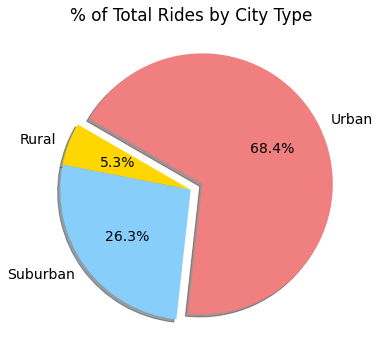

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(ride_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
ax.set_title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14
plt.show()


In [115]:
pyber_data_by_city = pyber_data_df.drop_duplicates('city')
driver_percentage = pyber_data_by_city.groupby('type').sum()['driver_count']/pyber_data_by_city['driver_count'].sum()*100
driver_percentage
pyber_data_by_city

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2271,Newtonview,2019-01-08 06:19:45,19.39,5350347217506,1,Rural
2275,North Jaime,2019-03-06 09:09:23,44.17,1152195873170,1,Rural
2276,Penaborough,2019-02-24 00:44:00,21.89,2069309881916,6,Rural
2286,Harringtonfort,2019-01-06 07:38:40,47.33,3849747342021,4,Rural


([<matplotlib.patches.Wedge at 0x1c01c6e10c8>,
 [Text(-1.0823507034414617, 0.1962573686763715, 'Rural'),
  Text(-1.0040234476137144, -0.44937391629006557, 'Suburban'),
  Text(1.1319401770540796, 0.39838603837330855, 'Urban')],
 [Text(-0.5903731109680699, 0.10704947382347535, '2.6%'),
  Text(-0.5476491532438442, -0.24511304524912664, '16.5%'),
  Text(0.6602984366148796, 0.2323918557177633, '80.9%')])

Text(0.5, 1.0, '% of Total Drivers by City Type')

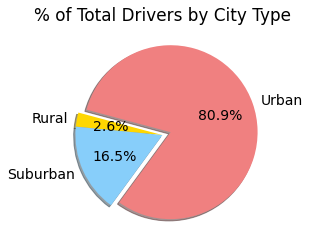

In [117]:
fix, ax = plt.subplots()
ax.pie(driver_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
ax.set_title('% of Total Drivers by City Type')
mpl.rcParams['font.size'] = 14
plt.show()